Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.style.use('ggplot')
import seaborn as sns

Importing the Dataset

In [2]:
train = pd.read_csv('../input/playground-series-s3e23/train.csv')
test = pd.read_csv('../input/playground-series-s3e23/test.csv')
submission = pd.read_csv('../input/playground-series-s3e23/sample_submission.csv')

Checking for missing values

In [3]:
train_missing = train.isnull().sum()
train_missing
test_missing = test.isnull().sum()
test_missing
#no missing values

id                   0
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
dtype: int64

DATA EXPLORATION

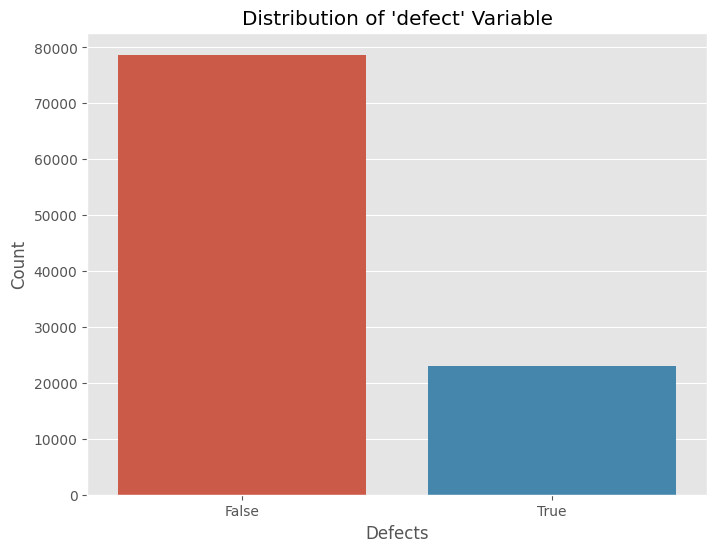

In [4]:
# Plot the distribution of the 'defect' variable
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='defects')
plt.title("Distribution of 'defect' Variable")
plt.xlabel("Defects")
plt.ylabel("Count")
plt.show()
#~77% False and ~23% True

In [5]:
train

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,101758,10.0,2.0,1.0,1.0,28.0,122.98,0.15,6.60,18.63,...,7,0,1,0,11.0,8.0,16.0,12.0,3.0,False
101759,101759,27.0,5.0,4.0,1.0,107.0,559.93,0.06,18.00,34.17,...,23,0,2,0,18.0,20.0,67.0,40.0,9.0,False
101760,101760,26.0,1.0,1.0,1.0,83.0,360.17,0.04,22.75,12.56,...,20,0,4,0,10.0,8.0,51.0,28.0,1.0,False
101761,101761,10.0,2.0,1.0,2.0,43.0,191.76,0.15,6.46,29.53,...,7,0,1,0,11.0,14.0,24.0,19.0,3.0,False


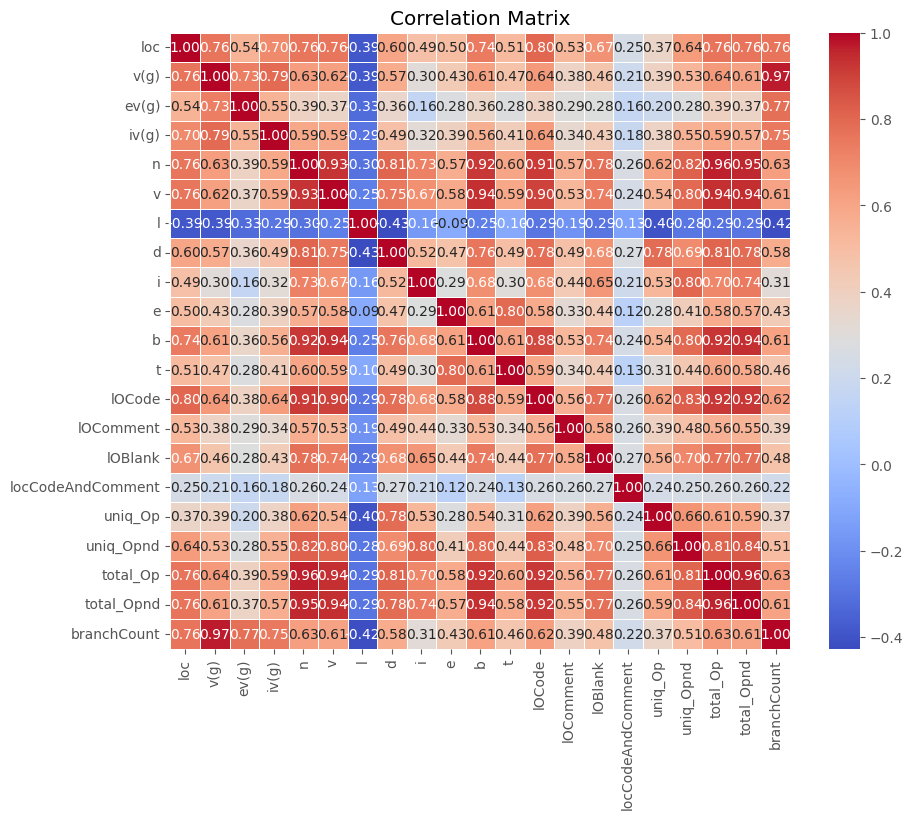

In [6]:
#Correlation Matrix
columns_to_drop = ["id", "defects"]
train_without_id_defects = train.drop(columns=columns_to_drop)
correlation_matrix = train_without_id_defects.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


There is a 97% correlation between branchCount and v(g).
There is a 96% correlation between total_Opnd and total_Op
There is a 96% correlation between total_Op and n
l is the only feature that is negative correlated with the other features.

the correlation value between each variable seams really high, we can use Feature Selection tecnique like PCA to reduce the number of variables 

In [7]:
'''import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load your dataset (assuming you've already loaded it as 'train')
# train = pd.read_csv('your_dataset.csv')

# Separate the target variable ('defect') from the features
X = train.drop(columns=["id", "defects"])  # Replace with your column names

# Standardize the feature matrix (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize PCA without specifying the number of components
pca = PCA()

# Fit PCA to the standardized feature matrix
pca.fit(X_scaled)

# Calculate the cumulative explained variance ratio
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Create a plot of explained variance vs. number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xticks(np.arange(1, len(cumulative_variance) + 1, 1))  # Set custom tick locations
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()
'''

'import pandas as pd\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.decomposition import PCA\n\n# Load your dataset (assuming you\'ve already loaded it as \'train\')\n# train = pd.read_csv(\'your_dataset.csv\')\n\n# Separate the target variable (\'defect\') from the features\nX = train.drop(columns=["id", "defects"])  # Replace with your column names\n\n# Standardize the feature matrix (important for PCA)\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(X)\n\n# Initialize PCA without specifying the number of components\npca = PCA()\n\n# Fit PCA to the standardized feature matrix\npca.fit(X_scaled)\n\n# Calculate the cumulative explained variance ratio\ncumulative_variance = np.cumsum(pca.explained_variance_ratio_)\n\n# Create a plot of explained variance vs. number of components\nplt.figure(figsize=(10, 6))\nplt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker=\'o\', linestyle=\'--\

We use CV to choose the best number of components

In [8]:
'''
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier  

candidate_components = [15,16,17,18]  
y=train["defects"]
model = RandomForestClassifier()  

best_score = -1
best_num_components = None

for num_components in candidate_components:
    pca = PCA(n_components=num_components)
    X_pca = pca.fit_transform(X_scaled)
    scores = cross_val_score(model, X_pca, y, cv=5)  
    mean_score = np.mean(scores)
    if mean_score > best_score:
        best_score = mean_score
        best_num_components = num_components

pca = PCA(n_components=best_num_components)
X_pca = pca.fit_transform(X_scaled)

'''
#the codes take a lot of time to run, the best result is with 18 num of components

'\nfrom sklearn.decomposition import PCA\nfrom sklearn.model_selection import cross_val_score\nfrom sklearn.ensemble import RandomForestClassifier  \n\ncandidate_components = [15,16,17,18]  \ny=train["defects"]\nmodel = RandomForestClassifier()  \n\nbest_score = -1\nbest_num_components = None\n\nfor num_components in candidate_components:\n    pca = PCA(n_components=num_components)\n    X_pca = pca.fit_transform(X_scaled)\n    scores = cross_val_score(model, X_pca, y, cv=5)  \n    mean_score = np.mean(scores)\n    if mean_score > best_score:\n        best_score = mean_score\n        best_num_components = num_components\n\npca = PCA(n_components=best_num_components)\nX_pca = pca.fit_transform(X_scaled)\n\n'

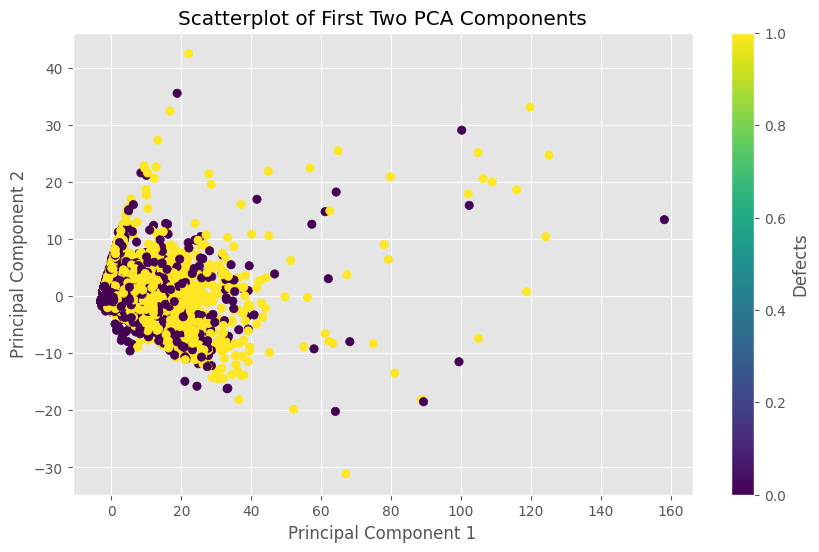

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = train.drop(columns=["id", "defects"])  # Replace with your column names
y = train["defects"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.colorbar(scatter, label='Defects')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatterplot of First Two PCA Components')
plt.grid(True)
plt.show()
#we can see that there isn't a clear pattern to separate the two classes
#there are several outliers in our dataset

In [10]:
'''
from sklearn.ensemble import IsolationForest

contamination_threshold = 0.05
iso_forest = IsolationForest(contamination=contamination_threshold, random_state=42)
iso_forest.fit(X_pca)
outlier_predictions = iso_forest.predict(X_pca)
outliers = X_scaled[outlier_predictions == -1]
outlier_indices = np.where(outlier_predictions == -1)[0]
train = train[outlier_predictions == 1]
print("Number of outliers:", len(outliers))
print("Indices of outliers:", outlier_indices)
'''
#outliers detection didn't give us good results, i'm gonna leave the code just in case

'\nfrom sklearn.ensemble import IsolationForest\n\ncontamination_threshold = 0.05\niso_forest = IsolationForest(contamination=contamination_threshold, random_state=42)\niso_forest.fit(X_pca)\noutlier_predictions = iso_forest.predict(X_pca)\noutliers = X_scaled[outlier_predictions == -1]\noutlier_indices = np.where(outlier_predictions == -1)[0]\ntrain = train[outlier_predictions == 1]\nprint("Number of outliers:", len(outliers))\nprint("Indices of outliers:", outlier_indices)\n'

Preparing our model

In [11]:
X = train.drop(columns = ['id', 'defects'], axis = 1)
Y = train['defects'].map({False: 0, True: 1})

test = test.drop(columns = ['id'], axis = 1)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Split your data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


I wanted to choose the best model to work on and tune the hyperparameters

In [15]:
'''
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb
import catboost as cat

# Random Forest (RF)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
RF_pred_test = rf_classifier.predict_proba(X_test)[:, 1]  # Probability of the positive class

# LightGBM (LGBM)
lgb_classifier = lgb.LGBMClassifier(n_estimators=100, random_state=42)
lgb_classifier.fit(X_train, y_train)
lgb_pred_test = lgb_classifier.predict_proba(X_test)[:, 1]  # Probability of the positive class

# XGBoost (XGB)
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(X_train, y_train)
xgb_pred_test = xgb_classifier.predict_proba(X_test)[:, 1]  # Probability of the positive class

# CatBoost (Cat)
cat_classifier = cat.CatBoostClassifier(iterations=100, random_state=42, verbose=0)
cat_classifier.fit(X_train, y_train)
cat_pred_test = cat_classifier.predict_proba(X_test)[:, 1]  # Probability of the positive class
'''

In [16]:
''''# Example model predictions
predictions_dict = {
    'RF': RF_pred_test,
    'LGBM': lgb_pred_test,
    'XGB': xgb_pred_test,
    'Cat': cat_pred_test
}

# True labels for the binary classification task
true_labels = y_test  # Replace with your true labels if using the test set

# Evaluate and compare models
best_model, best_roc_auc = evaluate_and_compare_models(predictions_dict, true_labels)

print(f"The best model is '{best_model}' with ROC AUC score: {best_roc_auc:.4f}")
'''

The best model is 'LGBM' with ROC AUC score: 0.7876


Let's tune the hyperparameters to improve the performance

In [ ]:
'''import lightgbm as lgb
import optuna
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

def objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 50),
        'subsample': trial.suggest_float('subsample', 0.8, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'random_state': 42
    }

    lgb_classifier = lgb.LGBMClassifier(**params)
    lgb_classifier.fit(X_train, y_train)

    y_pred = lgb_classifier.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred)

    return roc_auc

study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=100)

best_params = study.best_params
best_roc_auc = study.best_value

print("Best Hyperparameters:", best_params)
print("Best ROC AUC Score:", best_roc_auc)
'''

In [45]:
import lightgbm as lgb

# Define the best hyperparameters
best_params = {
    'n_estimators': 279,
    'learning_rate': 0.021241133894391254,
    'max_depth': 15,
    'min_child_samples': 19,
    'subsample': 0.9608832746914915,
    'colsample_bytree': 0.6290679011275677,
    'reg_alpha': 0.776395995987467,
    'reg_lambda': 0.9198416918864151,
    'random_state': 42
}
best_lgb_classifier = lgb.LGBMClassifier(**best_params)
best_lgb_classifier.fit(X_train, y_train)
lgbm_predictions = best_lgb_classifier.predict_proba(X_test)[:, 1]


The result was not good enough so i decided to keep going with RF and other bootstrap algorithm to have a better result and reduce the bias even more

In [ ]:
'''
from sklearn.ensemble import RandomForestClassifier
import optuna
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

def objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_float('max_features', 0.1, 1.0),
        'random_state': 42
    }

    rf_classifier = RandomForestClassifier(**params)
    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred)

    return roc_auc

study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=100)

best_params = study.best_params
best_roc_auc = study.best_value

print("Best Hyperparameters:", best_params)
print("Best ROC AUC Score:", best_roc_auc)
'''
#this portion of code was really heavy, the the best performing model is:
'''
[I 2023-10-17 14:38:07,403] Trial 74 finished with value: 0.7891321473827586 and parameters: {'n_estimators': 283, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 18, 'max_features': 0.6587786040429753}. Best is trial 74 with value: 0.7891321473827586.
'''

In [42]:
from sklearn.ensemble import RandomForestClassifier

# Define the best hyperparameters for Random Forest
best_rf_params = {
    'n_estimators': 283, 
    'max_depth': 10, 
    'min_samples_split': 3, 
    'min_samples_leaf': 18,  
    'max_features': 'auto', 
    'random_state': 42
}
#Best ROC AUC Score: 0.7891321473827586
best_rf_classifier = RandomForestClassifier(**best_rf_params)
best_rf_classifier.fit(X_train, y_train)
rf_predictions = best_rf_classifier.predict_proba(X_test)[:, 1]

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
'''import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

def objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'subsample': trial.suggest_float('subsample', 0.8, 1.0),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10),
        'random_state': 42,
    }

    catboost_classifier = CatBoostClassifier(**params, verbose=0)
    catboost_classifier.fit(X_train, y_train)

    y_pred = catboost_classifier.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred)

    return roc_auc

study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=100)

best_params = study.best_params
best_roc_auc = study.best_value

print("Best Hyperparameters:", best_params)
print("Best ROC AUC Score:", best_roc_auc)
'''

In [41]:
from catboost import CatBoostClassifier

# Define the best hyperparameters for CatBoost
best_catboost_params = {
    'iterations': 246,  
    'learning_rate': 0.043863646178155025,  
    'depth': 9,  
    'l2_leaf_reg': 0.8085824179157527,  
    'random_seed': 42
}
#Roc score: 0.7888873305087111
best_catboost_classifier = CatBoostClassifier(**best_catboost_params)
best_catboost_classifier.fit(X_train, y_train)
catboost_predictions = best_catboost_classifier.predict_proba(X_test)[:, 1]
'''
[I 2023-10-17 16:51:15,296] Trial 71 finished with value: 0.7888873305087111 and parameters: {'n_estimators': 246, 'learning_rate': 0.043863646178155025, 'max_depth': 9, 'subsample': 0.8085824179157527, 'l2_leaf_reg': 7.397334215855426}. Best is trial 71 with value: 0.7888873305087111.
'''

0:	learn: 0.6671826	total: 39.1ms	remaining: 9.58s
1:	learn: 0.6439504	total: 69.5ms	remaining: 8.48s
2:	learn: 0.6234526	total: 98.3ms	remaining: 7.96s
3:	learn: 0.6051256	total: 127ms	remaining: 7.67s
4:	learn: 0.5883003	total: 156ms	remaining: 7.53s
5:	learn: 0.5732002	total: 186ms	remaining: 7.44s
6:	learn: 0.5592318	total: 216ms	remaining: 7.37s
7:	learn: 0.5472104	total: 246ms	remaining: 7.31s
8:	learn: 0.5358973	total: 276ms	remaining: 7.27s
9:	learn: 0.5260876	total: 308ms	remaining: 7.26s
10:	learn: 0.5171013	total: 337ms	remaining: 7.2s
11:	learn: 0.5091228	total: 367ms	remaining: 7.16s
12:	learn: 0.5021025	total: 394ms	remaining: 7.07s
13:	learn: 0.4955717	total: 425ms	remaining: 7.05s
14:	learn: 0.4894065	total: 455ms	remaining: 7.01s
15:	learn: 0.4841586	total: 485ms	remaining: 6.98s
16:	learn: 0.4793576	total: 515ms	remaining: 6.94s
17:	learn: 0.4749141	total: 544ms	remaining: 6.89s
18:	learn: 0.4706654	total: 574ms	remaining: 6.85s
19:	learn: 0.4669871	total: 605ms	remai

"\n[I 2023-10-17 16:51:15,296] Trial 71 finished with value: 0.7888873305087111 and parameters: {'n_estimators': 246, 'learning_rate': 0.043863646178155025, 'max_depth': 9, 'subsample': 0.8085824179157527, 'l2_leaf_reg': 7.397334215855426}. Best is trial 71 with value: 0.7888873305087111.\n"

In [24]:
'''import optuna
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

def objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'min_child_weight': trial.suggest_float('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.8, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'random_state': 42,
    }

    xgb_classifier = XGBClassifier(**params)
    xgb_classifier.fit(X_train, y_train)

    y_pred = xgb_classifier.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred)

    return roc_auc

study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=100)

best_params = study.best_params
best_roc_auc = study.best_value

print("Best Hyperparameters:", best_params)
print("Best ROC AUC Score:", best_roc_auc)
'''

'import optuna\nfrom xgboost import XGBClassifier\nfrom sklearn.metrics import roc_auc_score\nfrom sklearn.model_selection import train_test_split\n\ndef objective(trial):\n    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)\n\n    params = {\n        \'n_estimators\': trial.suggest_int(\'n_estimators\', 100, 300),\n        \'learning_rate\': trial.suggest_float(\'learning_rate\', 0.01, 0.2, log=True),\n        \'max_depth\': trial.suggest_int(\'max_depth\', 5, 15),\n        \'min_child_weight\': trial.suggest_float(\'min_child_weight\', 1, 10),\n        \'subsample\': trial.suggest_float(\'subsample\', 0.8, 1.0),\n        \'colsample_bytree\': trial.suggest_float(\'colsample_bytree\', 0.6, 1.0),\n        \'reg_alpha\': trial.suggest_float(\'reg_alpha\', 0.0, 1.0),\n        \'reg_lambda\': trial.suggest_float(\'reg_lambda\', 0.0, 1.0),\n        \'random_state\': 42,\n    }\n\n    xgb_classifier = XGBClassifier(**params)\n    xgb_classifier.fit(

In [40]:
import xgboost as xgb

# Define the best hyperparameters for XGBoost
best_xgb_params = {
    'n_estimators': 242,  
    'learning_rate': 0.031740319712141384, 
    'max_depth': 5,  
    'min_child_weight': 8.83540303136755,  
    'subsample': 0.9178496777168208,
    'colsample_bytree': 0.6429104049068141,
    'reg_alpha': 0.02218640643815789,
    'reg_lambda': 0.29940285536404593, 
    'random_state': 42
}
#Best ROC AUC Score: 0.7897805056408711
best_xgb_classifier = xgb.XGBClassifier(**best_xgb_params)
best_xgb_classifier.fit(X_train, y_train)
xgboost_predictions = best_xgb_classifier.predict_proba(X_test)[:, 1]

'''
Best Hyperparameters: {'n_estimators': 242, 'learning_rate': 0.031740319712141384, 'max_depth': 5, 'min_child_weight': 8.83540303136755, 'subsample': 0.9178496777168208, 'colsample_bytree': 0.6429104049068141, 'reg_alpha': 0.02218640643815789, 'reg_lambda': 0.29940285536404593}
Best ROC AUC Score: 0.7897805056408711
'''

"\nBest Hyperparameters: {'n_estimators': 242, 'learning_rate': 0.031740319712141384, 'max_depth': 5, 'min_child_weight': 8.83540303136755, 'subsample': 0.9178496777168208, 'colsample_bytree': 0.6429104049068141, 'reg_alpha': 0.02218640643815789, 'reg_lambda': 0.29940285536404593}\nBest ROC AUC Score: 0.7897805056408711\n"

I've tuned all the model and got the best possible hyperparameters thanks to Optuna.
Until now our best model ks the xgb_classifier.
As I said before we are gonna apply some weights to our model to find the best possible solution.
I used a very easy but orthodox method, similar to Brute Force where i'm gonna try 1000 different combination of weight to find the best one

In [ ]:
import optuna
import numpy as np
from sklearn.metrics import roc_auc_score

# Define the objective function for Optuna
def objective(trial):
    w_lgbm = trial.suggest_float("w_lgbm", 0.1, 0.9)
    w_catboost = trial.suggest_float("w_catboost", 0.1, 0.9)
    w_xgboost = trial.suggest_float("w_xgboost", 0.1, 0.9)
    w_rf = 1.0 - w_lgbm - w_catboost - w_xgboost  # Ensure weights sum to 1

    #ensemble prediction using the weights
    ensemble_predictions = (
        w_lgbm * lgbm_predictions
        + w_catboost * catboost_predictions
        + w_xgboost * xgboost_predictions
        + w_rf * rf_predictions
    )

    ensemble_roc_auc = roc_auc_score(y_test, ensemble_predictions)

    return ensemble_roc_auc  

study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=1000)  # You can adjust the number of trials

best_weights = {
    "w_lgbm": study.best_params["w_lgbm"],
    "w_catboost": study.best_params["w_catboost"],
    "w_xgboost": study.best_params["w_xgboost"],
    "w_rf": 1.0 - study.best_params["w_lgbm"] - study.best_params["w_catboost"] - study.best_params["w_xgboost"],
}

best_roc_auc = study.best_value

print("Best Weights:", best_weights)
print("Best ROC AUC Score:", best_roc_auc)


In [61]:
best_xgb_classifier = xgb.XGBClassifier(**best_xgb_params)
best_xgb_classifier.fit(X_train, y_train)
xgboost_predictions = best_xgb_classifier.predict_proba(test)[:, 1]

best_catboost_classifier = CatBoostClassifier(**best_catboost_params)
best_catboost_classifier.fit(X_train, y_train)
catboost_predictions = best_catboost_classifier.predict_proba(test)[:, 1]

best_rf_classifier = RandomForestClassifier(**best_rf_params)
best_rf_classifier.fit(X_train, y_train)
rf_predictions = best_rf_classifier.predict_proba(test)[:, 1]

best_lgb_classifier = lgb.LGBMClassifier(**best_params)
best_lgb_classifier.fit(X_train, y_train)
lgbm_predictions = best_lgb_classifier.predict_proba(test)[:, 1]

0:	learn: 0.6671826	total: 40.5ms	remaining: 9.93s
1:	learn: 0.6439504	total: 71.8ms	remaining: 8.76s
2:	learn: 0.6234526	total: 101ms	remaining: 8.16s
3:	learn: 0.6051256	total: 129ms	remaining: 7.82s
4:	learn: 0.5883003	total: 160ms	remaining: 7.69s
5:	learn: 0.5732002	total: 190ms	remaining: 7.6s
6:	learn: 0.5592318	total: 220ms	remaining: 7.51s
7:	learn: 0.5472104	total: 251ms	remaining: 7.46s
8:	learn: 0.5358973	total: 282ms	remaining: 7.41s
9:	learn: 0.5260876	total: 311ms	remaining: 7.33s
10:	learn: 0.5171013	total: 340ms	remaining: 7.26s
11:	learn: 0.5091228	total: 372ms	remaining: 7.25s
12:	learn: 0.5021025	total: 400ms	remaining: 7.16s
13:	learn: 0.4955717	total: 431ms	remaining: 7.14s
14:	learn: 0.4894065	total: 463ms	remaining: 7.13s
15:	learn: 0.4841586	total: 492ms	remaining: 7.08s
16:	learn: 0.4793576	total: 522ms	remaining: 7.03s
17:	learn: 0.4749141	total: 550ms	remaining: 6.97s
18:	learn: 0.4706654	total: 581ms	remaining: 6.94s
19:	learn: 0.4669871	total: 611ms	remain

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [62]:
# Define the best weights
best_weights = {
    "w_lgbm": 0.10005028579462935,
    "w_catboost": 0.10026487835515442,
    "w_xgboost": 0.8540689287679697,
    "w_rf": -0.05438409291775348,
}

# Calculate the weighted ensemble prediction
ensemble_predictions = (
    best_weights["w_lgbm"] * lgbm_predictions +
    best_weights["w_catboost"] * catboost_predictions +
    best_weights["w_xgboost"] * xgboost_predictions +
    best_weights["w_rf"] * rf_predictions
)

Submission

In [63]:
test2 = pd.read_csv('../input/playground-series-s3e23/test.csv')
id_column = test2['id']
test['id'] = id_column


In [64]:
submission = pd.DataFrame({'id': test['id'], 'defects': ensemble_predictions})
submission.to_csv('lgbm_predictions_submission_finalensemble.csv', index=False)


In [65]:
submission.head()

,id,defects
0,101763,0.245339
1,101764,0.209583
2,101765,0.658165
3,101766,0.472945
4,101767,0.143423
